In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from pathlib import Path
#import tensorflow as tf

# Import our input dataset
data = Path('./Data/merged_clean_3Years_df.csv')
original_df = pd.read_csv(data)
original_df

,reportedcity,dateofloss,elevationdifference,floodzone,latitude,longitude,numberoffloorsintheinsuredbuilding,occupancytype,originalconstructiondate,amountpaidonbuildingclaim,...,reportedzipcode,stns,obs,pred,stn_lat,stn_lon,new_date_column,geometry,rolling_2days_obs,rolling_7days_obs
0,NO CHATHAM,2/21/2015,999,AE,41.7,-70.0,3,1,1/1/1955,2618.18,...,2650,14281,0.38,0.000000,41.6875,-69.9933,2/21/2015,POINT (-69.9933 41.6875),3.800000e-01,1.680000e+00
1,NEW BRAUNFELS,10/30/2015,2,AE,29.7,-98.1,3,1,12/2/2003,3309.59,...,78130,526,10.62,9.319764,29.7221,-98.1311,10/30/2015,POINT (-98.1311 29.7221),1.062000e+01,2.208000e+01
2,NEW BRAUNFELS,10/30/2015,7,AE,29.7,-98.1,2,1,7/1/2003,0.00,...,78130,526,10.62,9.319764,29.7221,-98.1311,10/30/2015,POINT (-98.1311 29.7221),1.062000e+01,2.208000e+01
3,NEW BRAUNFELS,10/30/2015,0,C,29.7,-98.1,3,1,10/17/1998,67301.33,...,78132,526,10.62,9.319764,29.7221,-98.1311,10/30/2015,POINT (-98.1311 29.7221),1.062000e+01,2.208000e+01
4,NEW BRAUNFELS,10/30/2015,999,C,29.7,-98.1,3,3,7/1/1995,0.00,...,78130,526,10.62,9.319764,29.7221,-98.1311,10/30/2015,POINT (-98.1311 29.7221),1.062000e+01,2.208000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75656,HAMMOND,4/11/2014,999,A,44.5,-75.6,2,1,1/1/1976,0.00,...,13646,17787,0.00,0.000000,44.3768,-69.2616,4/11/2014,POINT (-69.2616 44.3768),8.220000e-13,1.120000e+00
75657,ARVERNE,1/8/2014,999,A05,40.6,-73.8,3,1,1/1/1920,0.00,...,11692,14209,0.10,0.343227,42.5420,-123.4260,1/8/2014,POINT (-123.426 42.542),4.600000e-01,4.600000e-01
75658,YORKTOWN HTS,6/8/2013,999,X,41.3,-73.8,4,1,4/1/1968,3198.97,...,10598,14262,8.64,6.556328,41.2664,-73.7975,6/8/2013,POINT (-73.7975 41.2664),1.042000e+01,1.205000e+01
75659,MC GREGOR,10/26/2013,999,X,31.5,-97.3,1,1,6/28/2000,12654.47,...,76657,1561,0.00,0.000000,30.6081,-97.0317,10/26/2013,POINT (-97.0317 30.6081),-2.410000e-14,1.110000e-13


In [2]:
#cleaning up last7_df
df = original_df.copy()

df["rolling_7days_obs"] = df["rolling_7days_obs"].round(2)


#convert date columns to datetime64[ns] 
df['dateofloss'] =  pd.to_datetime(df['dateofloss'], format='%m/%d/%Y', errors='ignore')
df["originalconstructiondate"] = df["originalconstructiondate"].apply(pd.to_datetime)
#df['originalconstructiondate'] =  pd.to_datetime(df['originalconstructiondate'], format='%m/%d/%Y', errors='ignore')

#merged_df.dtypes
#split the dates into sperate columns for dd, mm and yyyy
#split date of loss
df[['lossyear','lossmonth','lossday']] = df.dateofloss.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))

#split original construction date
df[['builtyear','builtmonth','builtday']] = df.originalconstructiondate.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))


#convert split columns to floats
df['lossyear'] = df['lossyear'].astype(float)
df['lossmonth'] = df['lossmonth'].astype(float)
df['builtyear'] = df['builtyear'].astype(float)

#age of the property at the time of loss
df['propertyage'] = df['lossyear'] - df['builtyear'] 


df["Payoff_Bin"] = pd.cut(df.amountpaidonbuildingclaim, bins=[100,1000,5000,10000,50000,3000000], include_lowest=True, labels=["100-1000","1001-5000","5001-10000","10001-50000","50000+"])
#df["Payoff_Bin"] = pd.cut(df.amountpaidonbuildingclaim, bins=[0,5000,10000,20000,30000,50000,100000,200000,3000000], include_lowest=True, labels=["0-100","101-5000","5001-10000","10001-20000","20001-30000","30001-50000","50001-100000","100001-200000","200000+"])

In [3]:
# df_2015 = df.copy()

# indexNames = df_2015[df_2015['lossyear'] < 2015 ].index
 
# # Delete these row indexes from dataFrame
# df_2015.drop(indexNames , inplace=True)

In [4]:
#df_2015.dtypes

In [5]:
# df = df_2015.copy()

In [6]:

#df_encoded["rolling_7days_obs"] = original_df["rolling_7days_obs"]
indexNames = df[df['amountpaidonbuildingclaim'] < 100.0].index
 
#  # Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

df.amountpaidonbuildingclaim.min()

100.0

In [7]:
#keeping chosen features and dropping all other columns from merged data

df = df.drop("amountpaidonbuildingclaim", axis=1)
#df = df.drop("Payoff_Bin", axis=1)
df = df.drop("dateofloss", axis=1)
df = df.drop("elevationdifference", axis=1)
df = df.drop("latitude", axis=1)
df = df.drop("longitude", axis=1)
df = df.drop("numberoffloorsintheinsuredbuilding", axis=1)
df = df.drop("originalconstructiondate", axis=1)
df = df.drop("reportedcity", axis=1)
df = df.drop("lossyear", axis=1)
df = df.drop("lossday", axis=1)
df = df.drop("builtyear", axis=1)
df = df.drop("builtmonth", axis=1)
df = df.drop("builtday", axis=1)
df = df.drop("stn_lat", axis=1)
df = df.drop("stn_lon", axis=1)
df = df.drop("geometry", axis=1)
df = df.drop("new_date_column", axis=1)
df = df.drop("rolling_2days_obs", axis=1)
#df = df.drop("state", axis=1)
#df = df.drop("lossmonth", axis=1)
#df = df.drop("occupancytype", axis=1)
df = df.drop("rolling_7days_obs", axis=1)

#dropping columns that might be providing redundant information
df = df.drop("obs", axis=1)
df = df.drop("pred", axis=1)
df = df.drop("stns", axis=1)


#df.head(3)
df_encoded = pd.get_dummies(df, columns=["floodzone", "lossmonth", "occupancytype", "state"])
#df_encoded = pd.get_dummies(df, columns=["floodzone", "occupancytype", "lossmonth", "state"])

In [8]:
df.head(3)

,floodzone,occupancytype,state,reportedzipcode,lossmonth,propertyage,Payoff_Bin
0,AE,1,MA,2650,2.0,60.0,1001-5000
1,AE,1,TX,78130,10.0,12.0,1001-5000
3,C,1,TX,78132,10.0,17.0,50000+


In [9]:
# import matplotlib.pyplot as plt
# #generating a correlation matrix
# corrMatrix = df.corr()
# import seaborn as sn
# fig, ax = plt.subplots(figsize=(8,8)) 

# sn.heatmap(corrMatrix, annot=True, ax = ax)

In [10]:
#combining common floodzones
filter_zones_A = [col for col in df_encoded if col.startswith('floodzone_A')]
filter_zones_V = [col for col in df_encoded if col.startswith('floodzone_V')]

df_encoded["Zone A"] = df_encoded[filter_zones_A].sum(axis = 1, skipna = True)
df_encoded["Zone V"] = df_encoded[filter_zones_V].sum(axis = 1, skipna = True) 

df_encoded.rename(columns={"Zone A": "floodzone_A", "Zone V": "floodzone_V"})

,reportedzipcode,propertyage,Payoff_Bin,floodzone_A,floodzone_A01,floodzone_A02,floodzone_A03,floodzone_A04,floodzone_A05,floodzone_A06,...,state_UT,state_VA,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY,floodzone_A,floodzone_V
0,2650,60.0,1001-5000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,78130,12.0,1001-5000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,78132,17.0,50000+,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,78130,13.0,50000+,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,78130,32.0,10001-50000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75652,29510,10.0,50000+,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
75654,31906,42.0,5001-10000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
75658,10598,45.0,1001-5000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75659,76657,13.0,10001-50000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#df_encoded = df_encoded.drop(df_encoded[filter_zones_A], axis=1)
#df_encoded = df_encoded.drop(df_encoded[filter_zones_V], axis=1)
df_encoded.columns.tolist()
df_encoded.rename(columns={"Zone A": "floodzone_A", "Zone V": "floodzone_V"})

,reportedzipcode,propertyage,Payoff_Bin,floodzone_A,floodzone_A01,floodzone_A02,floodzone_A03,floodzone_A04,floodzone_A05,floodzone_A06,...,state_UT,state_VA,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY,floodzone_A,floodzone_V
0,2650,60.0,1001-5000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,78130,12.0,1001-5000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,78132,17.0,50000+,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,78130,13.0,50000+,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,78130,32.0,10001-50000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75652,29510,10.0,50000+,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
75654,31906,42.0,5001-10000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
75658,10598,45.0,1001-5000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75659,76657,13.0,10001-50000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#  #df_encoded_withrain = df_encoded.copy()


df_encoded["rolling_7days_obs"] = original_df["rolling_7days_obs"]
indexNames = df_encoded[df_encoded['rolling_7days_obs'] < 0.5].index
 
#  # Delete these row indexes from dataFrame
df_encoded.drop(indexNames , inplace=True)

df_encoded.rolling_7days_obs.min()


0.5

In [13]:
df_encoded

,reportedzipcode,propertyage,Payoff_Bin,floodzone_A,floodzone_A01,floodzone_A02,floodzone_A03,floodzone_A04,floodzone_A05,floodzone_A06,...,state_VA,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY,Zone A,Zone V,rolling_7days_obs
0,2650,60.0,1001-5000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.68
1,78130,12.0,1001-5000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,22.08
3,78132,17.0,50000+,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22.08
5,78130,13.0,50000+,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22.08
6,78130,32.0,10001-50000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75648,29356,50.0,10001-50000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.46
75649,29127,56.0,10001-50000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,14.58
75652,29510,10.0,50000+,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,49.13
75654,31906,42.0,5001-10000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,14.15


In [14]:
df_encoded = df_encoded.drop("rolling_7days_obs", axis=1)

In [15]:
from sklearn import tree

In [16]:
y =df_encoded.copy()
X =df_encoded.copy()
X = X.drop("Payoff_Bin", axis=1)

# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y['Payoff_Bin'],
                                                   random_state=1)

# Train the Classifier

from sklearn.linear_model import LinearRegression


#random forest, neural networks with linear regression
model = tree.DecisionTreeClassifier() 
model.fit(X_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
# Calculating the accuracy score.
predictions = model.predict(X_test)
acc_score = accuracy_score(y_test, predictions)
acc_score


#unscaled acc score = 0.3499

0.38348890982272843

In [21]:
predictions = model.predict(X_train)
acc_score_train = accuracy_score(y_train, predictions)
acc_score_train

0.9123843782117164

In [22]:
import numpy as np  
import matplotlib.pyplot as plt 

In [43]:
X_t = X_test.head(10)
y_t = y_test.head(10)
X_tr = X_train.head(10)
#pred = predictions.head(10)

In [44]:
predictions

array(['1001-5000', '10001-50000', '1001-5000', ..., '10001-50000',
       '1001-5000', '10001-50000'], dtype=object)

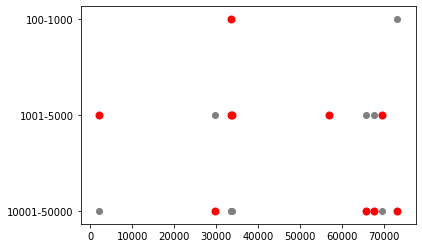

In [52]:
plt.scatter(X_t.index, y_t,  color='gray')
plt.scatter(X_t.index, predictions[:10], color='red', linewidth=2)
plt.show()

In [53]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [54]:

# Creating the decision tree classifier instance.
model = tree.DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_train_scaled, y_train)

In [55]:
# Making predictions using the testing data.
predictions = model.predict(X_test_scaled)
acc_score = accuracy_score(y_test, predictions)
acc_score

0.38348890982272843

In [ ]:
import pickle
pickle.dump(model, open('payout_range_model.pkl','wb'))

model = pickle.load(open('payout_range_model.pkl','rb'))

In [ ]:
print(model.predict([[3.0,
 1.68,
 60.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0]]))